# Proyecto Final del Curso: Ciencia de Datos Aplicada

### Nombre del Proyecto: Clustering Anidados

### Introduccion

##### En el presente proyecto, se implementa un proceso de clustering anidado, el cual permite realizar un analisis a un segundo nivel de granularidad sobre clusters con alto numero de elementos (vecindarios). Con la hipotesis que se obtendra una sub-clasificacion que permite reagrupar el cluster objetivo, identificando nuevos sub-grupos que le ofrezcan al cliente una reclasificacion para realizar una mejor y/o mas rapida seleccion de un vecindario de su preferencia.

##### Para la realizacion de este proyecto, se utilizaron datos de localizacion de Toronto, Canada. Especificamente, se utilizaron las coordenadas de los vecindarios de dicha ciudad. Asi mismo, se aprovecharon los datos de ubicación de Foursquare para obtener los negocios (venues) que se encuentran a un radio de 500 metros del centro del vecindario.

##### DESCRIPCION DEL PROBLEMA

Eluso de clusters para agrupar vecindarios con localidades similares aparenta ser de gran utilidad, sin embargo, altulizar nuestro dataset e implementar el algoritmo e k-means, manejando diferente numero de clusters, se observa un cluster predominante, el cual agrupa aproximadamente el 67% de los vecindarios. Como se muestra en los datos siguientes, donde se realizo el proceso de clustering con k=5, para los vecindarios de la ciudades de Toronto, Canada.  

Cluster Labels  

0________143  

1________7  

2________11  

3________1  

4________54  

Name: PostalCode, dtype: int64

El problema descrito, implica un escenario comercial en el que un usuario/cliente deseara seleccionar un vecindario que corresponda al cluster dominante, la diversidad de opciones no le permitiria discriminar de una forma favorable. Motivo por el cual, se propone una funcionalidad que permita hacer multiples procesos de agrupamiento sobre un cluster seleccionado, permitiendo asi incrementar el nivel de granularidad para la visualizacion y analisis de informacion.

En la presente propuesta, se plantea implementar, a nivel prototipo, un segundo proceso de clustering sobre el cluster predominante, es decir con mayor elementos (vecindarios). Con la hipotesis que nos dara una sub-clasificacion que permita reagrupar el cluster objetivo identificando nuevos sub-grupos que le ofrezcan al cliente una reclasificacion que le permita realizar una mejor y/o mas rapida seleccion de un vesindario de su preferencia.



#### DATOS

Para la realizacion de este proyecto, se utilizaran los datos de localizacion de la ciudad de Central Toronto, de Toronto, Canada. Especificamente, se utilizaran las coordenadas de los vecindarios de dicha ciudad. Asi mismo, se aprovechar la datos de ubicación de Foursquare para obtener los negocios (venues) que se encuentran a un radio de 500 metros del centro del vecindario.

#### METODOLOGIA

El proyecto consistio en 4 etapas principales:  
1) acopio de datos,  
2) preprocesado de datos  
3) generacion del modelo, y  
4) analisis de resultados.

##### Acopio de Datos
En esta fase se procedio a obtener los datos principalmente de las fuentes previamente estudiadas en el curso. 

Primeramente se obtuvieron los datos geoespaciales de la ciudad de Toronto, se realizo la lectura del archivo con las coordenadas de localizacion de la liga: http://cocl.us/Geospatial_data. La cual permite descargar el archivo csv directamente. El archivo csv se bajo para accederlo localmente y crear el dataframe de postal code (df_PC).

Posteriormente se obtuvo la informacion de las ciudades y vecindarios requeridos, de la ciudad de Toronto, los cuales fueron obtenidos de la pagina de wikipedia: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

Finalmente, se obtuvieron los datos de los sitios de interes distribuidos en los vecindarios de la ciudad de Toronto, estos datos se obtuvieron del Foursquare, mediante su API disponible en https://api.foursquare.com/

#### Preprocesado de Datos
Una vez obtenidos los datos, se llevo a cabo la generacion de dataframes por cada uno de los bancos de datos mencionados en el punto anterior. Adicionalmente se llevaron a cabo tareas de union y limpieza de dataframes. Por ejemplo, el dataframe principal (master), que incluye incialmente los datos de codigo postal, ciudades y vecindarios de Toronto (ver Figura 1), se le agregaron las coordenadas (longitud y latitud) del dataframe de datos geoespaciales.

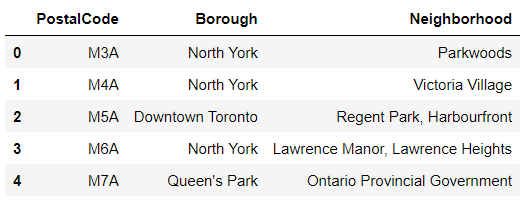
<center><bold>Figura 1 Master dataframe</bold></center>

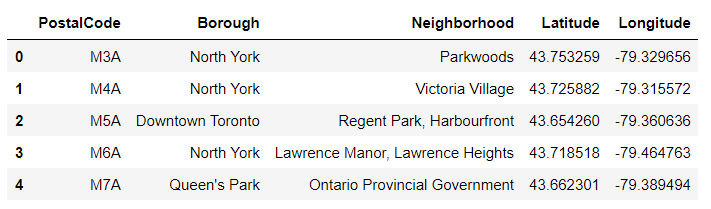
<center><bold>Figura 2 Master dataframe mas datos de localidad</bold></center>

<center>Figura 3 Matriz one hot de sitios de interes por vecindario<>

Por otro lado, los datos obtenidos de Foursquare, lo referente a los sitios de interes cercanos a los vecindarios, se genero una matriz one-hot, con las amenidades que cada vecindario tenia presente (ver Figura 3), que posteriormente se redujo al agrupar filas por vecindario y calculando la frecuencia y media por tipo de sitio de interes. Este dataframe es el utilizado para el proceso de clusternig mediante el algoritmo de K-means.

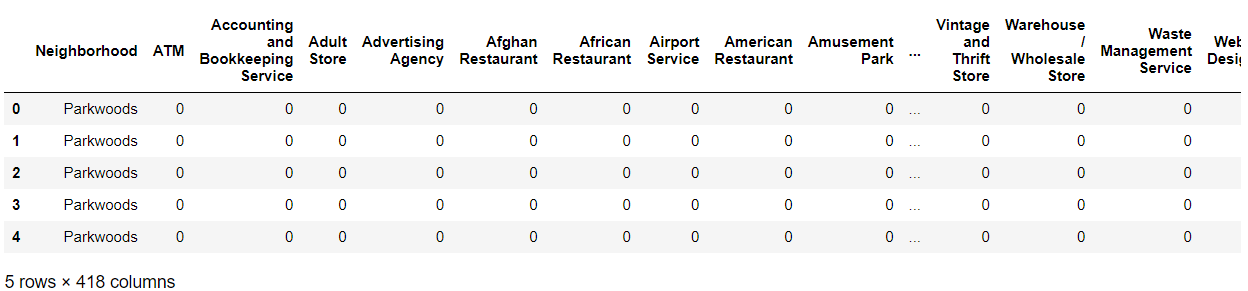
<center>Figura 3 Matriz one hot de sitios de interes por vecindario</center>
    
    
    Posteriormente, para cada uno de los vecindarios en el dataset, se identificaron los 10 servicios con mayor frecuencia o predominancia (ver Figura 4).
    
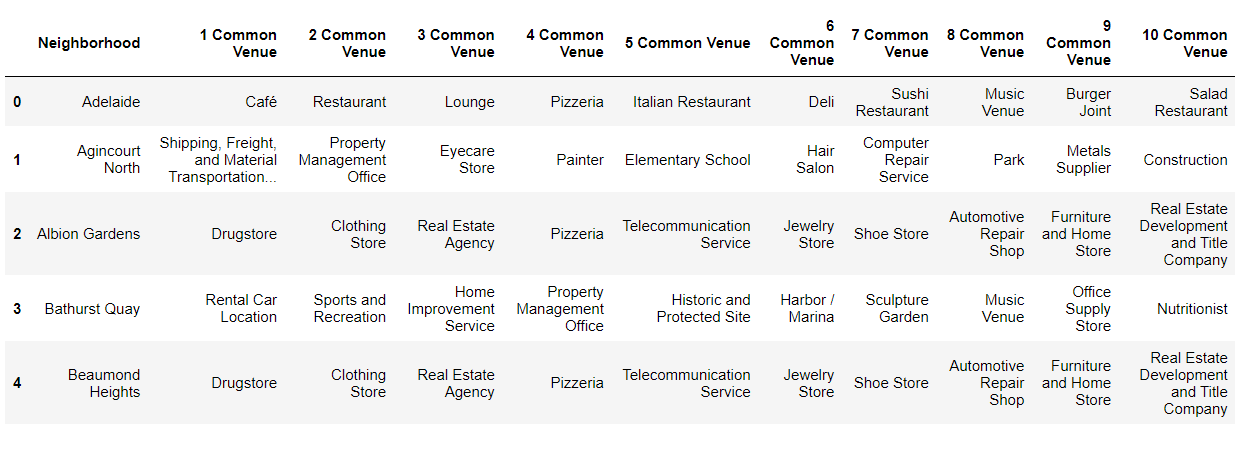
    <center>Figura 4 Sitios de interes predominantes por vecindario</center>
    
    
Finalmente, se complemento este dataframe, agregando el cluster asignado, posterior al proceso de agrupamiento, y las coordenadas para su ubicacion geografica.

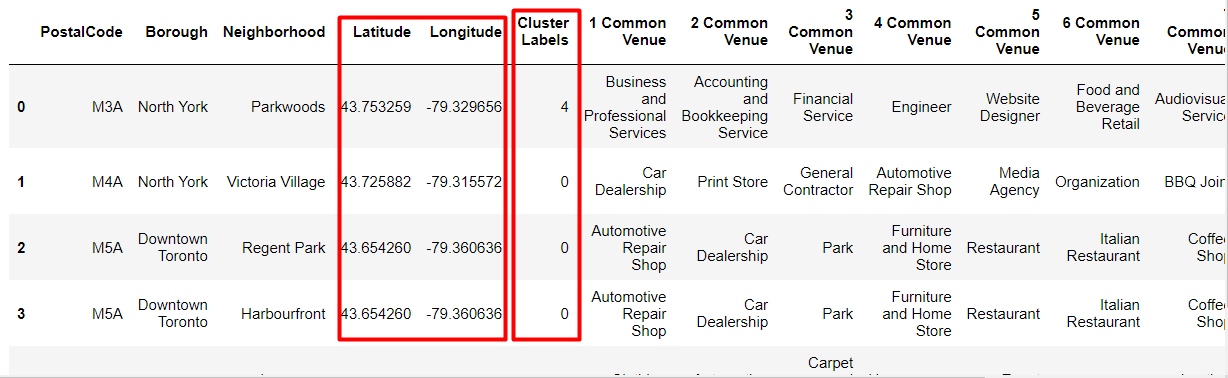
<center>Figura 5 Dataframe final para usar al desplegar el mapa</center>
    
    
#### Generacion del modelo
Para este proyecto se procedio a generar unmodelo de clustering que nos permitio agrupar cada uno de los vecindarios en Toronto en los diferentes contenedores generados por el algoritmo K-means. Para este proceso, como se comento anteriormente, se procedio a preparar el dataset one-hot agrpado con frecuencias para posteriormente alimentar el algoritmo KMeans, disponible enla libreria de SickiLearn. 
    
El algoritmo de clasificaci'on se configuro en relacion al numero de clusters a considerar, que en este caso fueron 5 clusters los seleccionados en la corrida final. Es importante mencionar que se realizaron diferentes corridas con cantidades diferentes de clusters, y el comportamiento fue similar, siempre hubo predominancia de un cluster con la mayoria de los puntos del dataset. En la Figura 6 podemos observar el resultado de la clasificacion, observando que se obtuvo un cluster predominante (0).
    
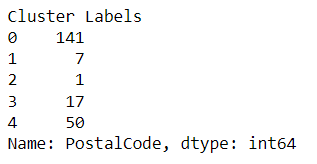
<center>Figura 6 Asignacion de vecindarios a clusters</center> 
    
Posterior a la generacion del modelo, la clasificacion obtenida se utilizo para preparar el dataframe a utilizarse en el despliegue del mapa.
    
Con base en lo estipulado en el proyecto y considerando los resultados de clasificacion obtenidos, se procedio a preparar nuevamente un dataset para correr de nuevo el algoritmo de agrupamiento. Para este proceso se generaron 3 dataframes alternos, y posteriormente se eliminaron todos los registros que no fueron asignados al cluster predominante (0).
    
#### Analisis de Resultados
En esta fase se procedio, primeramente a analizar los resultados de agrupamiento de la primera corrida de clustering, y posteriormente se analizo la segunda corrida. Una descripcion mas detallada se presenta en las siguientes secciones: resultados y analisis.    
    

#### RESULTADOS

En esta seccion presentamos los resultados de agrupamiento que se obtuvieron en las dos fases de agrupamiento, la inicial y la anidada (la realizada con el resultado de uno de los clusters con mayor predominancia).

#### Clustering inicial
En esta fase podemos observar que existe un cluster predominante que concentra la mayoria de las instancias a clasificar, en este caso contenia mas del 60% de los registros. Esto lo podemos observar en la Figura 6, mostrada en la seccion anterior. Asi como en el mapa que presenta la Figura 7.

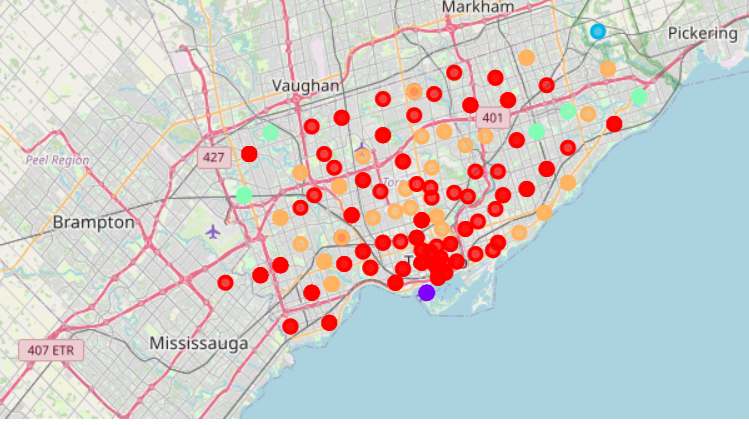
<center>Figura 7 Mapa de clasificacion de vecindarios: proceso de clasificacion inicial</center>

#### Clustering anidado
Al identificar un cluster predominante, procedimos a ejecutar un nuevo proceso de agrupamiento con el conjunto de datos que le fueron asignados (anidamiento de clustering). Sorprendementemente, aun cuando en el proceso inicial fueron considerados como similares, en la segunda corrida obtuvimos una reclasificacion bastante beneficioza para categorizar este grupo vecindarios. En la Figura 8 observamos cuantitativamente como se redistribuyeron los registros del cluster predominante, y en la Figura 9 podemos observarlo graficamente en el mapa.

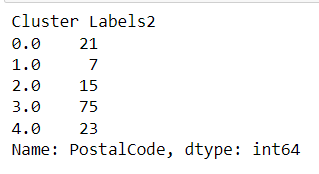
<center>Figura 8 Asignacion de vecindarios a clusters: anidado</center>

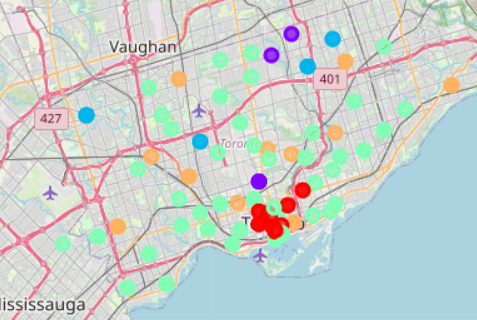
<center>Figura 9 Mapa de clasificacion de vecindarios: proceso de clasificacion anidada</center>


#### ANALISIS

Como resultados del estudio, podemos observar que el proceso de recategorizacion, o anidamiento de clustering nos ofrecio un mejor propuesta de identificar similitudes o diferencias entre los vecindarios, tomando como referencia los sitios de interes que se encuentran en sus cercanias. Inclusive, en el proceso de categorizacion anidada se observo una mejor distribucion de los vecindarios. Sin embargo, nuevamente observamos, como se muestra en la Figura 8, que el cluster 3 es predominante ante el resto. En este caso, podemos ejecutar un nivel adicional de anidamiento de clustering, para identificar diferencias entre este grupo de veincdarios que aparentan ser similares.  

#### CONCLUSIONES

Los resultados obtenidos nos permite observar que los algoritmos de agrupamiento son utiles para procesar datos no supervisados, en este caso, encontrar similitudes entre vecindarios, con base en los sitios de interes que se encuentran a sus alrededores. Con base en lo observado, podemos identificar que esta funcionalidad puede ser facilmente trasladada a un prototipo funcional, donde el usuario pueda seleccionar un cluster especifico y correr un proceso de reagrupacion. Adicionalmente, el proceso de clustering mediante el algoritmo de k-means, puede ser mejorado ejecutando un clustering anidado de forma automatica cuando se detecte uno o mas clusters predominantes, poniendo como umbral, por ejemplo, clusters que absorvan mas del 50% de los puntos a clasificar. Con lo anterior, podriamos proponer un esquema de definion de un valor reducido para la variable K, y de forma anidada ir generando nuevos clusters hasta que se cumpla el umbral definido. En este escenario, la variable K ya no requiere ser definida subjetivamente y puede ser estimada cuantitativamente por el mismo algoritmo. 